# Modelos Theta y 4Theta

# Modelos Theta

In [1]:
# 
import os, sys
from google.colab import drive
drive.mount('/content/mnt', force_remount=True)
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks/Librerias', nb_path)
#sys.path.insert(0, nb_path)  # or append(nb_path)
sys.path.append(nb_path)  # or append(nb_path)

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import warnings
warnings.filterwarnings('ignore')

Es necesario tener instalado DARTS

[Darts: https://unit8co.github.io/darts/index.html](https://unit8co.github.io/darts/index.html)


In [7]:
!pip install --ignore-installed llvmlite
!pip install darts

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.53.1 requires llvmlite<0.37,>=0.36.0rc1, but you have llvmlite 0.39.1 which is incompatible.



  Using cached llvmlite-0.39.1-cp38-cp38-win_amd64.whl (23.2 MB)
  Using cached darts-0.22.0-py3-none-any.whl (451 kB)
  Using cached pytorch_lightning-1.8.0.post1-py3-none-any.whl (796 kB)
  Using cached xarray-2022.11.0-py3-none-any.whl (963 kB)
  Using cached shap-0.41.0-cp38-cp38-win_amd64.whl (435 kB)
  Using cached statsforecast-1.2.1-py3-none-any.whl (78 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.13.2 requires pandas<1.5.0,>=1.1.0, but you have pandas 1.5.1 which is incompatible.
sktime 0.13.2 requires scipy<1.9.0, but you have scipy 1.9.3 which is incompatible.



  Using cached lightgbm-3.3.3-py3-none-win_amd64.whl (1.0 MB)
  Using cached catboost-1.1.1-cp38-none-win_amd64.whl (74.0 MB)
  Using cached nfoursid-1.0.1-py3-none-any.whl (16 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached lightning_utilities-0.3.0-py3-none-any.whl (15 kB)
  Using cached torchmetrics-0.10.2-py3-none-any.whl (529 kB)
  Using cached lightning_lite-1.8.0.post1-py3-none-any.whl (136 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached numba-0.56.4-cp38-cp38-win_amd64.whl (2.5 MB)
  Attempting uninstall: numba
    Found existing installation: numba 0.53.1
    Uninstalling numba-0.53.1:
      Successfully uninstalled numba-0.53.1
  Attempting uninstall: statsforecast
    Found existing installation: statsforecast 0.7.1
    Uninstalling statsforecast-0.7.1:
      Successfully uninstalled statsforecast-0.7.1


In [4]:
pip install darts

  Using cached darts-0.22.0-py3-none-any.whl (451 kB)
  Using cached shap-0.41.0-cp38-cp38-win_amd64.whl (435 kB)
  Using cached xarray-2022.11.0-py3-none-any.whl (963 kB)
  Using cached lightgbm-3.3.3-py3-none-win_amd64.whl (1.0 MB)
  Using cached pytorch_lightning-1.8.0.post1-py3-none-any.whl (796 kB)
  Using cached catboost-1.1.1-cp38-none-win_amd64.whl (74.0 MB)
  Using cached statsforecast-1.2.1-py3-none-any.whl (78 kB)
  Using cached nfoursid-1.0.1-py3-none-any.whl (16 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached torchmetrics-0.10.2-py3-none-any.whl (529 kB)
  Using cached lightning_lite-1.8.0.post1-py3-none-any.whl (136 kB)
  Using cached lightning_utilities-0.3.0-py3-none-any.whl (15 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached numba-0.56.4-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached llvmlite-0.39.1-cp38-cp38-win_amd64.whl (23.2 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
Note

ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [3]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Utilizamos la libreria **darts**
- Seleccionamos los datos de Lineas aereas

In [4]:
# %%
from darts import TimeSeries
from darts.datasets import AirPassengersDataset


- **Grafico de la Serie Temporal de lineas aereas**



In [5]:

# %%
series = AirPassengersDataset().load()
series


<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

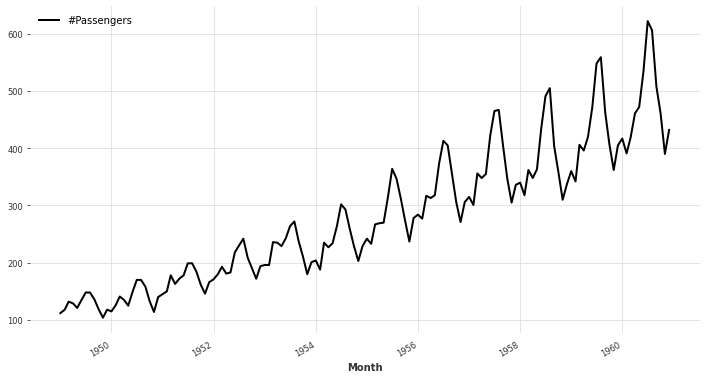

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
series.plot()

- Diferentes formas de seleccionat TRAIN y TEST



```
split_before
```



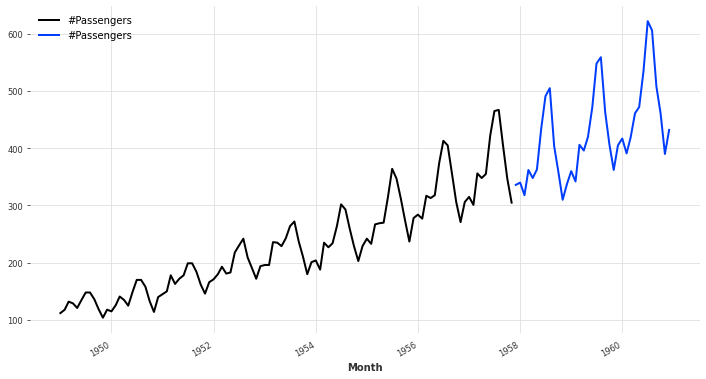

In [7]:
# %%
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()



#### Obtenemos el train y el test

- Con el número de observaciones

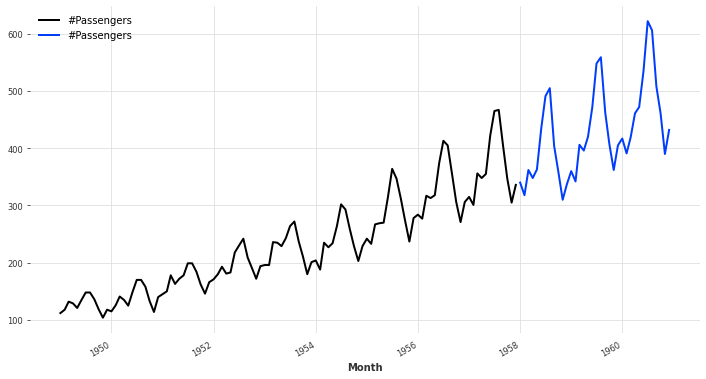

In [8]:

# %%
series1, series2 = series[:-36], series[-36:]
series1.plot()
series2.plot()


Con la fecha

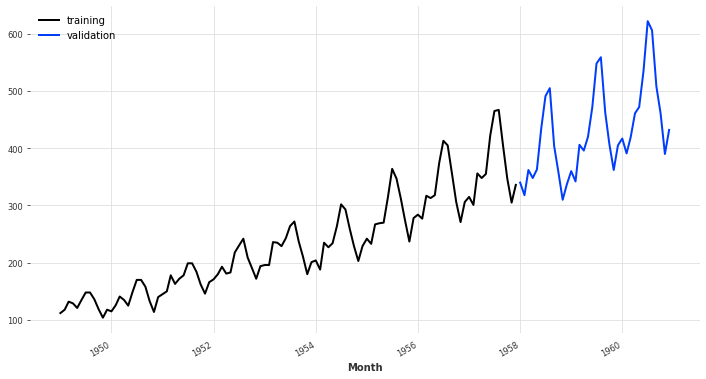

In [9]:

# %%
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")



In [13]:
type(train)

darts.timeseries.TimeSeries

Comenzamos con el modelo THETA

In [14]:

# %%
from darts.models import Theta, FourTheta
from darts.metrics import mape
model =Theta(seasonality_period=12) # Supone Theta 2
model.fit(train)
forecast = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))




model Theta(2) obtains MAPE: 8.15%


#### Un modelo theta con periodo estacional 12 y es 2 que es el predeterminado

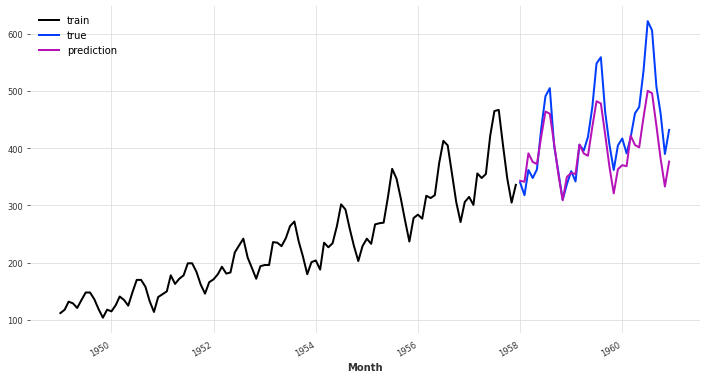

In [15]:
# %%
train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

In [16]:

# %%
# Search for the best theta parameter, by trying 50 different values
thetas = 2- np.linspace(-10, 10, 50)# cogemos 50 valores teta desde menos 10 hasta 10. Pero como le restamos 2 entre 12 y menos 8

best_mape = float("inf")
best_theta = 0




for theta in thetas:

    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta


#### obtenemos el teta que menor mape tenga

In [126]:
thetas

array([12.        , 11.59183673, 11.18367347, 10.7755102 , 10.36734694,
        9.95918367,  9.55102041,  9.14285714,  8.73469388,  8.32653061,
        7.91836735,  7.51020408,  7.10204082,  6.69387755,  6.28571429,
        5.87755102,  5.46938776,  5.06122449,  4.65306122,  4.24489796,
        3.83673469,  3.42857143,  3.02040816,  2.6122449 ,  2.20408163,
        1.79591837,  1.3877551 ,  0.97959184,  0.57142857,  0.16326531,
       -0.24489796, -0.65306122, -1.06122449, -1.46938776, -1.87755102,
       -2.28571429, -2.69387755, -3.10204082, -3.51020408, -3.91836735,
       -4.32653061, -4.73469388, -5.14285714, -5.55102041, -5.95918367,
       -6.36734694, -6.7755102 , -7.18367347, -7.59183673, -8.        ])

In [128]:
best_theta

-3.5102040816326543

In [129]:

# %%
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)


The MAPE is: 4.40, with theta = -3.5102040816326543.


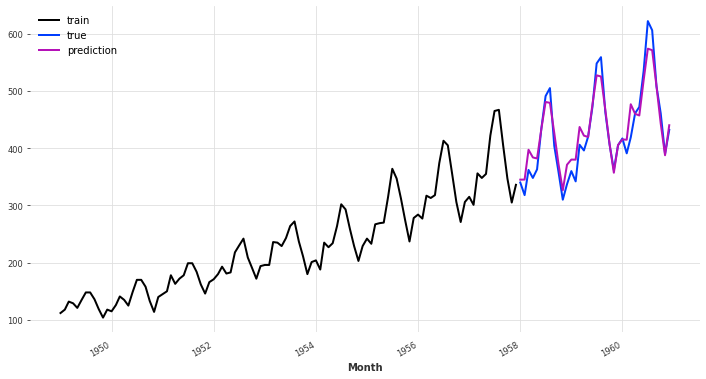

In [132]:
# %%
train.plot(label="train")
val.plot(label="true")
pred_best_theta.plot(label="prediction")

In [130]:
best_theta_model.model_params

OrderedDict([('theta', -3.5102040816326543),
             ('seasonality_period', None),
             ('season_mode',
              <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>)])

# Modelo 4Theta

In [133]:

model =FourTheta(seasonality_period=12)
model.fit(train)
forecast = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))




model 4Theta(theta:2, curve:TrendMode.LINEAR, model:ModelMode.ADDITIVE, seasonality:SeasonalityMode.MULTIPLICATIVE) obtains MAPE: 8.08%


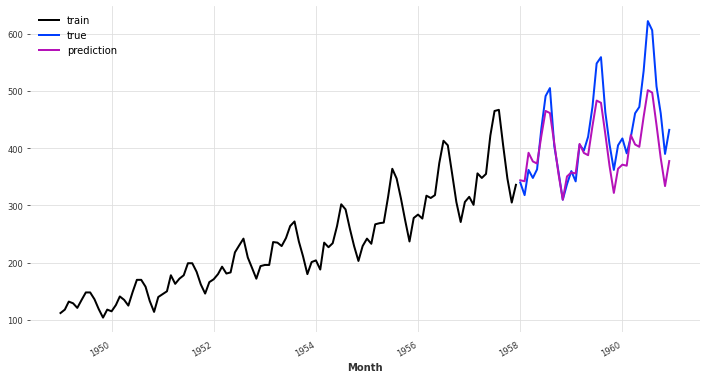

In [134]:
# %%
train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

In [135]:
from darts.utils.utils import SeasonalityMode, TrendMode, ModelMode
theta_grid = {
    #'theta':2- np.linspace(-10, 10, 10),
    'theta':[-4,-3,-2,-1,1,2,3,4],
    'model_mode': [ModelMode.ADDITIVE,ModelMode.MULTIPLICATIVE],
    'season_mode': [SeasonalityMode.MULTIPLICATIVE,SeasonalityMode.ADDITIVE],
    'trend_mode': [TrendMode.EXPONENTIAL,TrendMode.LINEAR]
}

best_grid_model=FourTheta.gridsearch(parameters=theta_grid,
                                series=train,
                                forecast_horizon=36, # 12
                                start=0.5,
                                last_points_only=False,
                                metric=mape,
                                reduction=np.mean,
                                verbose=False,
                                n_jobs=-1)

best_grid_model

(<darts.models.forecasting.theta.FourTheta at 0x7fc15ba24550>,
 {'theta': -2,
  'model_mode': <ModelMode.ADDITIVE: 'additive'>,
  'season_mode': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>,
  'trend_mode': <TrendMode.LINEAR: 'linear'>},
 9.141060770390638)

#### lo primero que definimos es el grid. En total son 64 modelos. Utilizamos el best grid para coger el mejor modelo en base a esos parámetros que escogemos. El modelo que nos sale es theta -2, aditiva, multiplicativa y linear. Ese mape no se puede comparar porque es el historical forecast

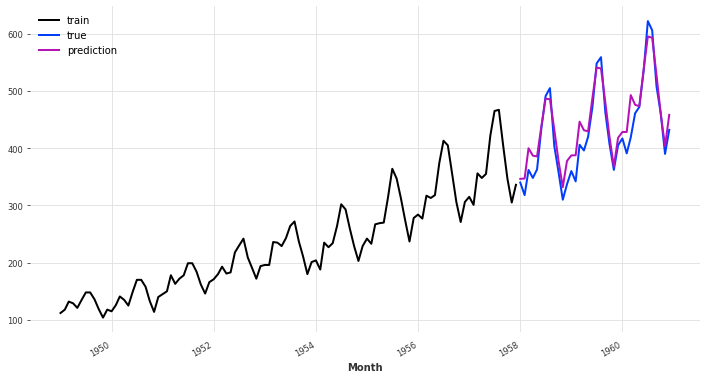

In [136]:
modelo=FourTheta(theta=best_grid_model[1]['theta'],
                 model_mode=ModelMode.ADDITIVE,
                 season_mode=SeasonalityMode.MULTIPLICATIVE,
                 trend_mode=TrendMode.LINEAR
                 )
modelo.fit(train)
pred_modelo = modelo.predict(len(val))

train.plot(label="train")
val.plot(label="true")
pred_modelo.plot(label="prediction")

#### Ploteamos el modelo que nos dice el grid

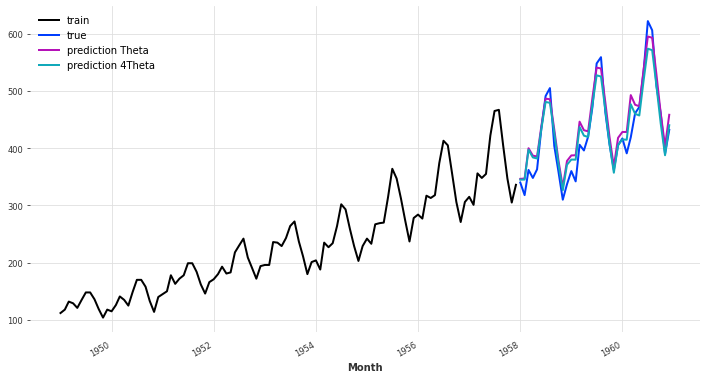

In [140]:

# %%
train.plot(label="train")
val.plot(label="true")
pred_modelo.plot(label="prediction Theta")
pred_best_theta.plot(label="prediction 4Theta")


# Cross Validation: Historical

100%|██████████| 76/76 [00:01<00:00, 43.12it/s]


MAPE = 4.78%


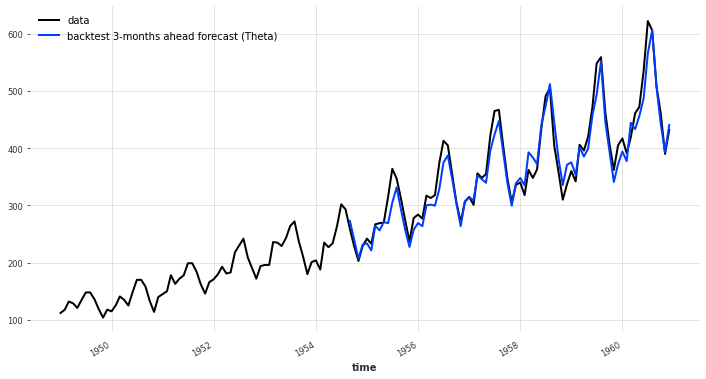

In [147]:


# %%
historical_fcast_theta = best_theta_model.historical_forecasts(
    series, start=0.4, forecast_horizon=12, verbose=True
)

series.plot(label="data")
historical_fcast_theta.plot(label="backtest 3-months ahead forecast (Theta)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_theta, series)))




#### le decimos que coja la serie completa, empezando en el 40% de los datos con un horizonte de 12

## BackTest

100%|██████████| 76/76 [00:01<00:00, 43.44it/s]


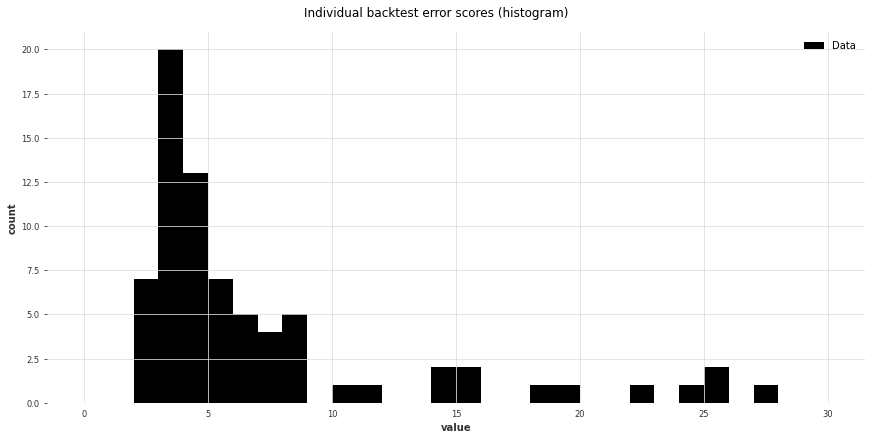

In [153]:

# %%


raw_errors = best_theta_model.backtest(
    series, 
    start=0.4, 
    forecast_horizon=12, 
    metric=mape, 
    reduction=None, # None: return errors
    verbose=True
)

from darts.utils.statistics import plot_hist

plot_hist(
    raw_errors,
    bins=np.arange(0, max(raw_errors), 1),
    title="Individual backtest error scores (histogram)",
)



#### el modelo se la pega en algunas situaciones ya que tienes MAPE altos algunas veces. El modelo no es constante

In [154]:

# %%
average_error = best_theta_model.backtest(
    series,
    start=0.4,
    forecast_horizon=12,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)




100%|██████████| 76/76 [00:01<00:00, 44.94it/s]


Average error (MAPE) over all historical forecasts: 7.83
